# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Dataset Cleaning

In [3]:
df=pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 #### To check how many feature has null values

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
dataset=df.copy(deep=True)

 #### Finding correlation between features by Pearson method

In [7]:
label_encoder = LabelEncoder()
dataset['Outlet_Type']=label_encoder.fit_transform(dataset['Outlet_Type'])
dataset['Outlet_Location_Type']=label_encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Size']=label_encoder.fit_transform(dataset['Outlet_Size'])
corr=dataset.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,-0.015656,0.004715,-0.001088,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.015656,0.087796,-0.002473,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.004715,-0.028099,0.000232,-0.089216,-0.290216,1.000000,0.467219,0.089367
Outlet_Type,-0.001088,-0.173468,-0.001975,-0.122304,-0.432062,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,-0.172477,0.089367,0.401522,1.000000


 #### Tried to find correlation with establishment year but it was giving only some years

In [8]:
mode_of_Outlet_Establishment_Year=df.pivot_table(values='Outlet_Size', columns='Outlet_Establishment_Year', aggfunc='last')
mode_of_Outlet_Establishment_Year

Outlet_Establishment_Year,1985,1987,1997,1999,2004,2009
Outlet_Size,Medium,High,Small,Medium,Small,Medium


 ####  So, most grocery store are small and most Supermarket Type1 is Small etc..
 #### So, I am filling Groceray store which has Nan of outlet size in row with small. 

In [9]:
mode_of_Outlet_Type=df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc='last')
mode_of_Outlet_Type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [10]:
missing_values=df['Outlet_Size'].isnull()
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_Type[x])

#### Dropping all the rows which has NaN values

In [11]:
df=df.dropna(axis=0)

#### Now checking the unique values of each columns and make them correct.

In [12]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

#### As we can see Low fat==LF & low fat. And Regular==rg

In [13]:
replace_values = {'reg' : 'Regular', 'LF' : 'Low Fat', 'low fat' : 'Low Fat' }                                                                                          

df= df.replace({"Item_Fat_Content": replace_values})  


In [14]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Filling visibility NaN values with mean

In [15]:
df_model=df['Item_Visibility'].fillna(value=df['Item_Visibility'].mean())


 ## Handling Outliers

### Checking outliers with Box-Plot

#### Item_MRP with Item_Type

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Type'>

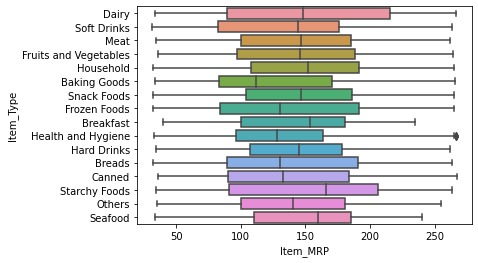

In [16]:
sns.boxplot(data=df, x='Item_MRP',y='Item_Type')

#### Item_Weight with Item_Type

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Type'>

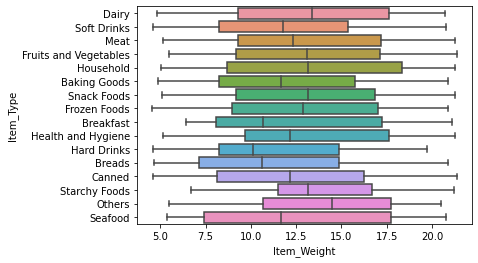

In [17]:
sns.boxplot(data=df, x='Item_Weight',y='Item_Type')

 ### Checking outliers with percentile
 ##### We can see their is not outliers

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626808
std,4.643456,0.048625,62.411888,6.588984,1533.445842
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026768,94.143600,1997.000000,922.798800
50%,12.600000,0.052493,142.729900,2002.000000,1789.670400
75%,16.850000,0.092774,186.024000,2007.000000,2966.139000
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


#### Checking outliers of Item_MRP

In [19]:
iqr=186.026600-94.412000
lower_bound_val = 94.412000 -(1.5 * iqr) 
upper_bound_val = 186.026600 +(1.5 * iqr) 

print(lower_bound_val,upper_bound_val)

-43.00989999999999 323.44849999999997


#### Checking outliers of Item_Weight

In [20]:
iqr=16.700000-8.645000
lower_bound_val = 8.645000 -(1.5 * iqr) 
upper_bound_val = 16.700000 +(1.5 * iqr) 

print(lower_bound_val,upper_bound_val)

-3.4375 28.7825


# Expolarity Data Analysis

### We need to answer these questions.

1. Which store has most sale rate?
2. what fat content product most sale in each area?
3. What the outlet size effect on sale rate?
4. Visibility role in product sale?
5. Which product most and least sale on which store?
6. Which top 20 item most sold?
7. Which outlet type has most sale?
8. Which are the most outlet size store?

### 1. Which store has most sale rate?

In [21]:
store_vice_sale=df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().reset_index()
store_vice_sale

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,1.883402e+05
1,OUT013,2.142664e+06
2,OUT017,2.167465e+06
3,OUT018,1.851823e+06
4,OUT035,2.268123e+06
5,OUT045,2.036725e+06
6,OUT046,2.118395e+06
7,OUT049,2.183970e+06


<BarContainer object of 8 artists>

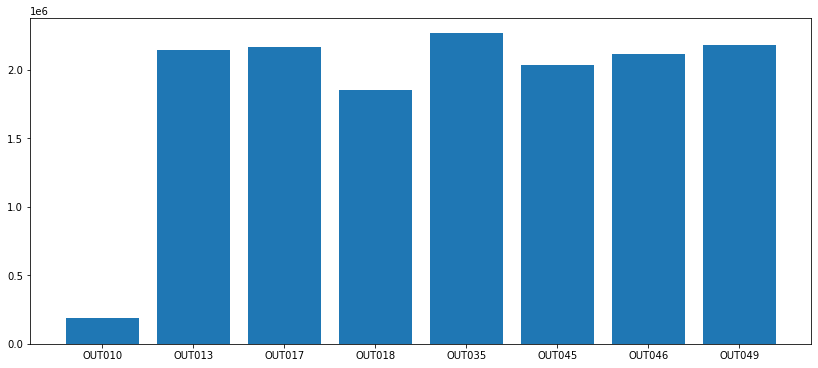

In [22]:
plt.figure(figsize=(14, 6))
plt.bar(store_vice_sale['Outlet_Identifier'],store_vice_sale['Item_Outlet_Sales'])

###### Most lowest sale in OUT010 store and highest on OUT035

### 2. What fat content product most sale in area?

In [23]:
area_vice_fate_sale=df.groupby(['Outlet_Location_Type','Item_Fat_Content']).count().reset_index()

Text(0.5, 1.0, 'Sale of each fate product area-vice')

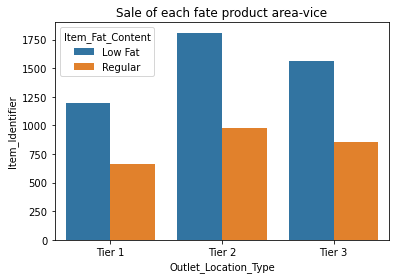

In [24]:
sns.barplot(x='Outlet_Location_Type', y="Item_Identifier", hue="Item_Fat_Content", data=area_vice_fate_sale).set_title("Sale of each fate product area-vice")

###### Low fate has most sale in each area

### 3. What the outlet size effect on sale?

In [25]:
Outlet_Size_Effect=df.groupby(['Outlet_Identifier','Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index()

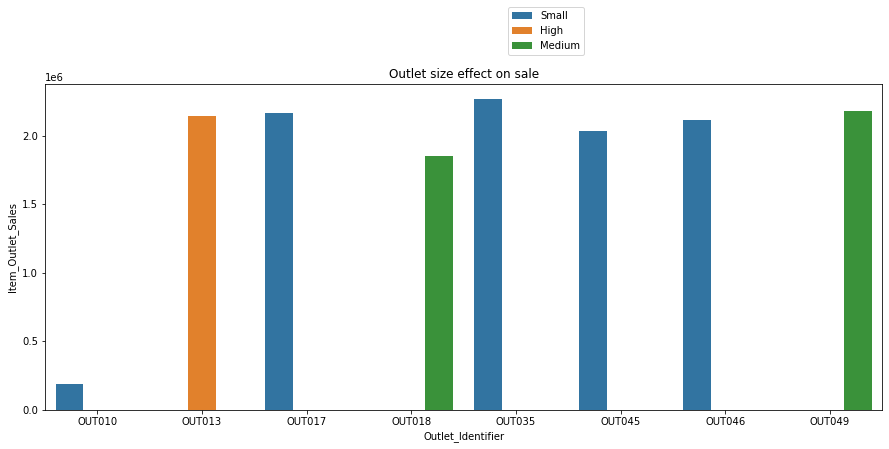

In [26]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Outlet_Identifier', y="Item_Outlet_Sales", hue="Outlet_Size", data=Outlet_Size_Effect).set_title("Outlet size effect on sale")
plt.legend(bbox_to_anchor =(0.65, 1.25))

#### Outlet size does't effect on sale.

### 4. Visibility role in product sale?

<AxesSubplot:ylabel='Frequency'>

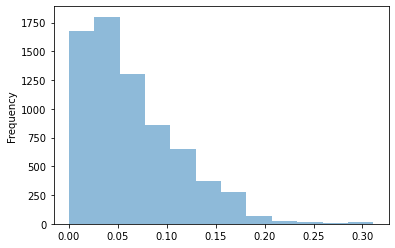

In [27]:
df['Item_Visibility'].plot.hist(bins=12, alpha=0.5)

In [28]:
df['Visibility']=0
df['Visibility']=pd.cut(df.Item_Visibility,[0,0.05,0.10,0.15,0.20,0.25,0.30]).astype(str)

In [29]:
df.groupby(['Visibility'])['Item_Type'].count().reset_index()

,Visibility,Item_Type
0,"(0.0, 0.05]",2989
1,"(0.05, 0.1]",2117
2,"(0.1, 0.15]",1054
3,"(0.15, 0.2]",402
4,"(0.2, 0.25]",40
5,"(0.25, 0.3]",20


###### The product those visibility were less most sold. 

### 5. Which product most and least sale on which store?

In [30]:
df.groupby(['Outlet_Identifier','Item_Type'])['Item_Outlet_Sales'].sum().reset_index().head()

,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,OUT010,Baking Goods,10693.4138
1,OUT010,Breads,7657.3658
2,OUT010,Breakfast,4081.3540
3,OUT010,Canned,9019.5926
4,OUT010,Dairy,15307.4078


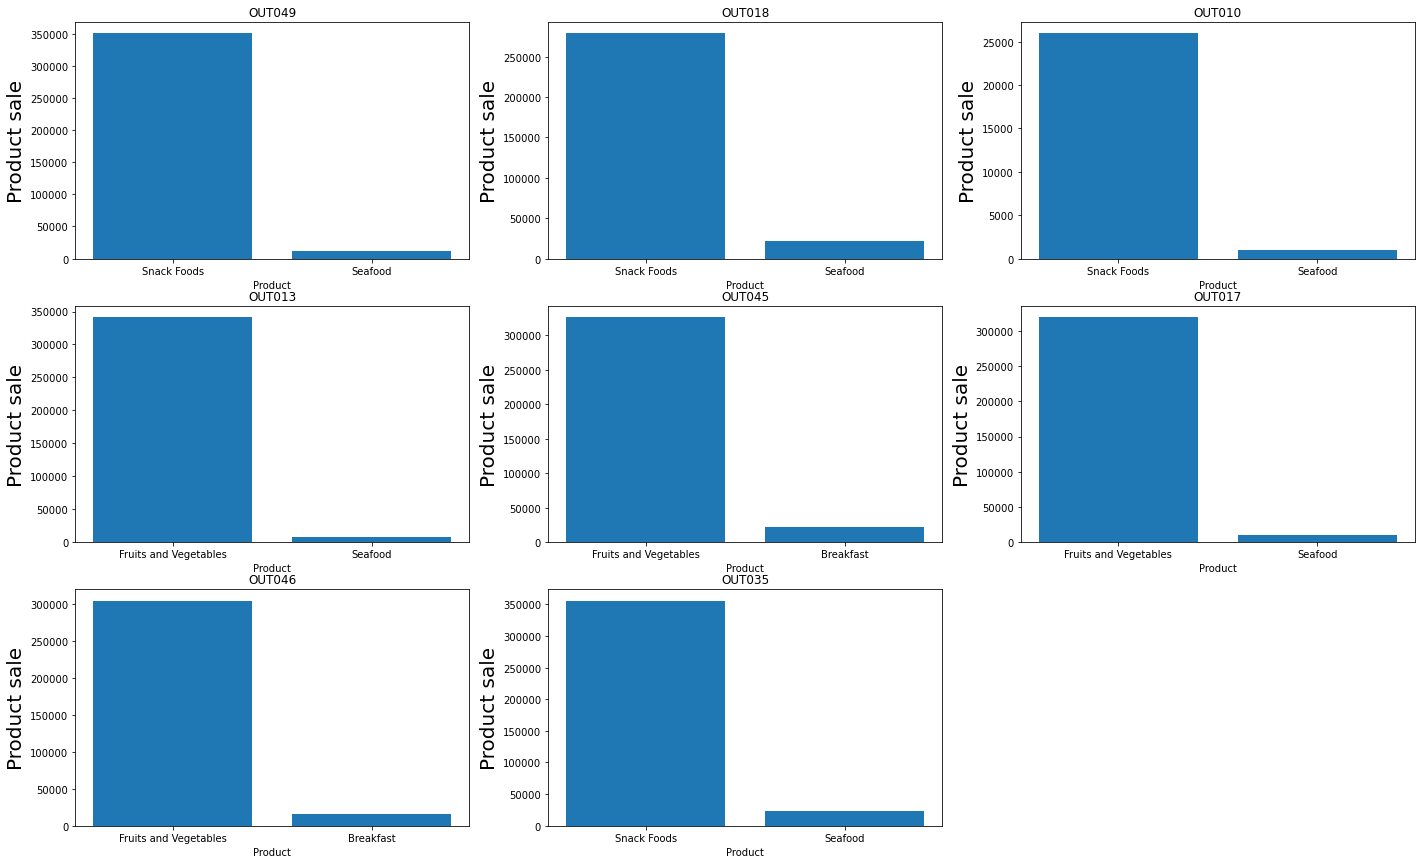

In [31]:
plt.figure(figsize=(24,20))
plotnumber=1
for i in df["Outlet_Identifier"].unique():
    df1=df[df["Outlet_Identifier"]==i]
    df1=df1.groupby(["Item_Type"])["Item_Outlet_Sales"].agg(["sum"]).sort_values(by="sum",ascending=False)
    df1=pd.DataFrame(df1)
    df1.reset_index(inplace=True)
    df2=df1[(df1["sum"]==df1["sum"].max())|(df1["sum"]==df1["sum"].min())]
    if plotnumber<=10 :
        plt.subplot(4,3,plotnumber)
        plt.bar(df2["Item_Type"],df2["sum"])
        plt.title(i)
        plt.ylabel("Product sale",fontsize=20)
        plt.xlabel("Product",fontsize=10)
    plotnumber+=1
plt.show()

### 6. Which top 20 item most sold?

In [32]:
df.groupby(['Item_Identifier'])['Item_Outlet_Sales'].sum().reset_index().nlargest(20, ['Item_Outlet_Sales'])

,Item_Identifier,Item_Outlet_Sales
156,FDA15,35110.2972
1206,FDY55,33152.8452
305,FDD44,32723.4042
358,FDF05,31032.9380
614,FDL58,30584.1888
148,FDA04,30043.5592
357,FDF04,29707.9960
1548,NCZ18,28918.3572
1460,NCQ53,28835.7980
1226,FDZ20,28739.9228


### 7. Which outlet type has most sale?

In [33]:
most_sale_by_outlettype_df=df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index()

<BarContainer object of 3 artists>

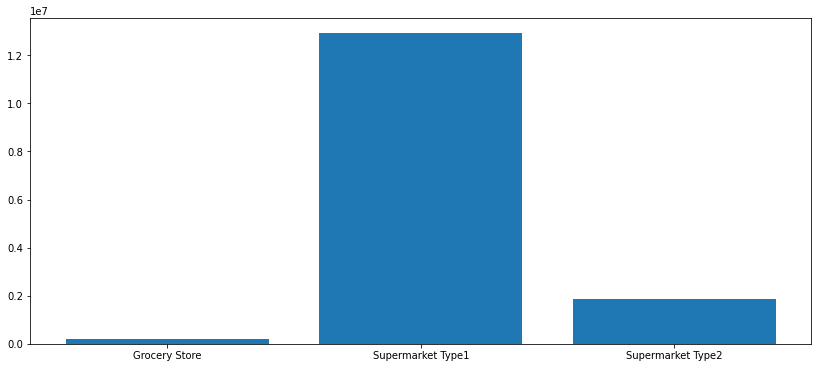

In [34]:
plt.figure(figsize=(14, 6))
plt.bar(most_sale_by_outlettype_df['Outlet_Type'],most_sale_by_outlettype_df['Item_Outlet_Sales'])

###### Super market type1 has most sale rate

### 8. Which are the most outlet size store?

<BarContainer object of 3 artists>

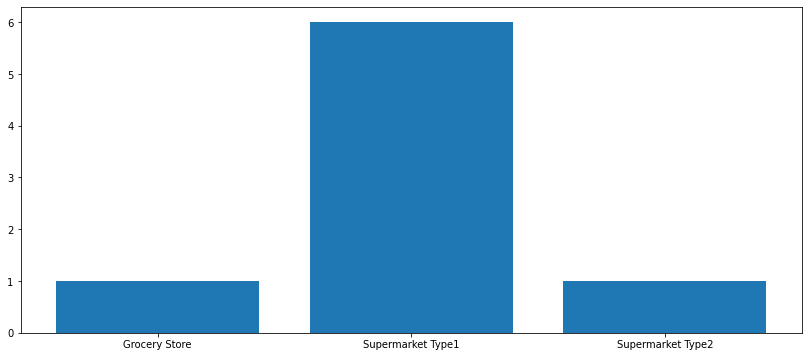

In [35]:
most_outlet_size_store=df.groupby(['Outlet_Type','Outlet_Identifier','Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index()
most_outlet_size_store=most_outlet_size_store.groupby(['Outlet_Type'])['Outlet_Size'].count().reset_index()
plt.figure(figsize=(14, 6))
plt.bar(most_outlet_size_store['Outlet_Type'],most_outlet_size_store['Outlet_Size'])

###### As we seen most market are Supermarket Type 1, and they have best selling

# Converting Categorical To Numerical

In [36]:
label_encoder = LabelEncoder()
df['Outlet_Type']=label_encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Location_Type']=label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Size']=label_encoder.fit_transform(df['Outlet_Size'])
df['Item_Identifier']=label_encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=label_encoder.fit_transform(df['Item_Fat_Content'])
df['Outlet_Identifier']=label_encoder.fit_transform(df['Outlet_Identifier'])
df['Item_Type']=label_encoder.fit_transform(df['Item_Type'])

In [37]:
df_model=df.drop(columns=['Outlet_Establishment_Year','Visibility','Outlet_Location_Type','Item_Identifier'])
df_model['Item_Visibility'].fillna(value=df_model['Item_Visibility'].mean())
corr=df_model.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.023238,-0.014048,0.030765,0.027141,-0.006993,-0.014775,-0.001088,0.014123
Item_Fat_Content,-0.023238,1.000000,0.053994,-0.142228,0.001843,0.001773,-0.000486,0.001455,0.017424
Item_Visibility,-0.014048,0.053994,1.000000,-0.038977,-0.006061,-0.109911,0.053436,-0.150666,-0.085334
Item_Type,0.030765,-0.142228,-0.038977,1.000000,0.035628,0.000780,0.001455,-0.000922,0.022231
Item_MRP,0.027141,0.001843,-0.006061,0.035628,1.000000,0.002156,0.000397,0.003307,0.620961
Outlet_Identifier,-0.006993,0.001773,-0.109911,0.000780,0.002156,1.000000,0.229989,0.199126,0.174302
Outlet_Size,-0.014775,-0.000486,0.053436,0.001455,0.000397,0.229989,1.000000,-0.317601,-0.056164
Outlet_Type,-0.001088,0.001455,-0.150666,-0.000922,0.003307,0.199126,-0.317601,1.000000,0.177184
Item_Outlet_Sales,0.014123,0.017424,-0.085334,0.022231,0.620961,0.174302,-0.056164,0.177184,1.000000


# Seperating Training And Test Data

In [88]:
X=df_model.iloc[:,:-1]
y=df_model.iloc[:,-1]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Running The Models

### Linear Model

In [40]:
from sklearn.linear_model import LinearRegression

In [93]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.4663187120944995

In [94]:
y_train_pred=y_train.to_numpy()

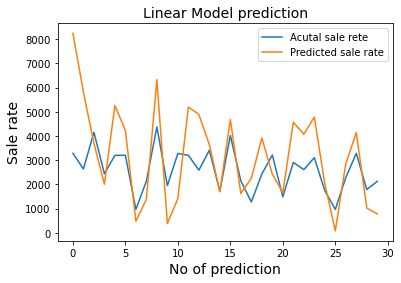

In [98]:
X_train_pred_linear=reg.predict(X_train)
plt.plot(X_train_pred_linear[:30])
plt.plot(y_train_pred[:30])
plt.xlabel('No of prediction', fontsize=14)
plt.ylabel('Sale rate', fontsize=14)
plt.title('Linear Model prediction', fontsize=14)
plt.legend(['Acutal sale rete', 'Predicted sale rate'])

### XGBoost Regressor

In [99]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

[00:17:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5519194553163356

Text(0.5, 1.0, 'XGBoost Model prediction')

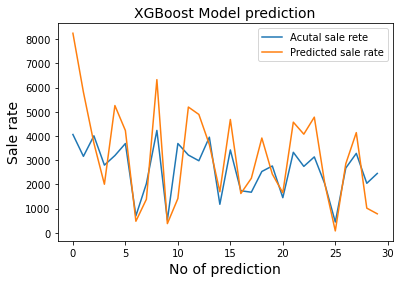

In [101]:
X_train_pred=model.predict(X_train)
plt.plot(X_train_pred[:30])
plt.plot(y_train_pred[:30])
plt.xlabel('No of prediction', fontsize=14)
plt.ylabel('Sale rate', fontsize=14)
plt.legend(['Acutal sale rete', 'Predicted sale rate'])
plt.title('XGBoost Model prediction', fontsize=14)

In [ ]:
# Hyper Parameter Tuning XGB And GBR

In [ ]:
# Standard Scaling 06m Robust Scaling

### Robust Scalling

In [103]:
from sklearn import preprocessing

In [107]:
columns_name=[]
for col in X_train.columns:
    columns_name.append(col)
columns_name  

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Type']

In [119]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(X_train)
robust_df = pd.DataFrame(robust_df, columns =columns_name)

In [129]:
robust_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type
0,0.539368,1.0,-0.554529,1.166667,0.944223,-0.50,0.0,0.0
1,0.520769,1.0,1.625004,-0.166667,0.568363,-0.75,-2.0,0.0
2,-0.328580,0.0,-0.406287,-0.500000,1.325564,0.50,0.0,0.0
3,0.055797,0.0,0.348252,-0.333333,0.282999,0.00,0.0,0.0
4,-0.483571,1.0,0.335804,0.000000,0.497195,0.75,-1.0,0.0


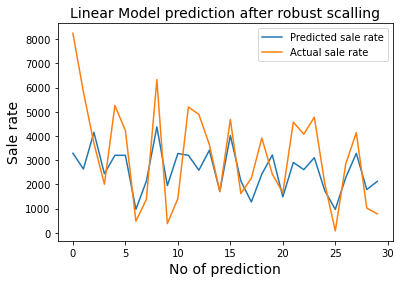

In [121]:
reg_robust = LinearRegression().fit(robust_df, y_train)
robust_scalling_pred_linear=reg_robust.predict(robust_df)
plt.plot(robust_scalling_pred_linear[:30])
plt.plot(y_train_pred[:30])
plt.xlabel('No of prediction', fontsize=14)
plt.ylabel('Sale rate', fontsize=14)
plt.title('Linear Model prediction after robust scalling', fontsize=14)
plt.legend(['Predicted sale rate', 'Actual sale rate'])

In [123]:
model_robust= XGBRegressor()
model_robust.fit(robust_df, y_train)

[00:31:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

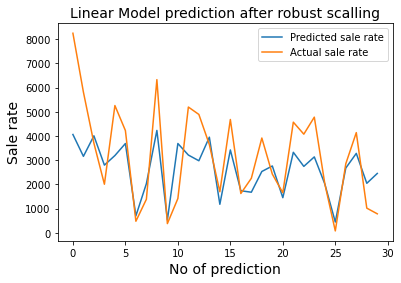

In [124]:
robust_scalling_pred_XGBoost=model_robust.predict(robust_df)
plt.plot(robust_scalling_pred_XGBoost[:30])
plt.plot(y_train_pred[:30])
plt.xlabel('No of prediction', fontsize=14)
plt.ylabel('Sale rate', fontsize=14)
plt.title('XGBoost Model prediction after robust scalling', fontsize=14)
plt.legend(['Predicted sale rate', 'Actual sale rate'])

### Standard Scalling

In [126]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X_train)
standard_df = pd.DataFrame(standard_df, columns =columns_name)

In [128]:
standard_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type
0,0.889736,1.357378,-0.990646,1.361841,1.400160,-0.773150,0.739174,-0.125875
1,0.857435,1.357378,1.974907,-0.542452,0.849919,-1.228353,-2.062743,-0.125875
2,-0.617669,-0.736714,-0.788943,-1.018525,1.958425,1.047658,0.739174,-0.125875
3,0.049896,-0.736714,0.237710,-0.780489,0.432159,0.137254,0.739174,-0.125875
4,-0.886848,1.357378,0.220773,-0.304415,0.745732,1.502860,-0.661784,-0.125875


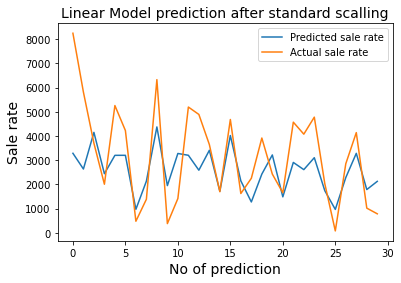

In [131]:
reg_standard = LinearRegression().fit(standard_df, y_train)
standard_scalling_pred_linear=reg_standard.predict(standard_df)
plt.plot(standard_scalling_pred_linear[:30])
plt.plot(y_train_pred[:30])
plt.xlabel('No of prediction', fontsize=14)
plt.ylabel('Sale rate', fontsize=14)
plt.title('Linear Model prediction after standard scalling', fontsize=14)
plt.legend(['Predicted sale rate', 'Actual sale rate'])

In [ ]:
model_standard= XGBRegressor()
model_standard.fit(standard_df, y_train)

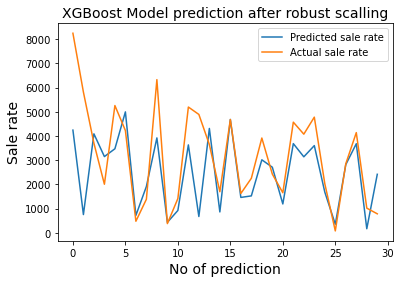

In [132]:
standard_scalling_pred_XGBoost=model_robust.predict(standard_df)
plt.plot(standard_scalling_pred_XGBoost[:30])
plt.plot(y_train_pred[:30])
plt.xlabel('No of prediction', fontsize=14)
plt.ylabel('Sale rate', fontsize=14)
plt.title('XGBoost Model prediction after robust scalling', fontsize=14)
plt.legend(['Predicted sale rate', 'Actual sale rate'])

# Final Predictions On The Test Dataset

In [60]:
test_df=pd.read_csv('New_Test.csv')
test_df['Outlet_Type']=label_encoder.fit_transform(test_df['Outlet_Type'])
test_df['Outlet_Location_Type']=label_encoder.fit_transform(test_df['Outlet_Location_Type'])
test_df['Outlet_Size']=label_encoder.fit_transform(test_df['Outlet_Size'])
test_df['Item_Identifier']=label_encoder.fit_transform(test_df['Item_Identifier'])
test_df['Item_Fat_Content']=label_encoder.fit_transform(test_df['Item_Fat_Content'])
test_df['Outlet_Identifier']=label_encoder.fit_transform(test_df['Outlet_Identifier'])
test_df['Item_Type']=label_encoder.fit_transform(test_df['Item_Type'])
test_df_model=test_df.drop(columns=['Outlet_Establishment_Year','Outlet_Location_Type','Item_Identifier'])
test_df_model=test_df_model.iloc[:,1:]
test_df_model

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type
0,20.750,0,0.007565,13,107.8622,7,1,1
1,8.300,1,0.038428,4,87.3198,2,2,1
2,14.600,0,0.099575,11,241.7538,0,2,0
3,7.315,0,0.015388,13,155.0340,2,2,1
4,9.800,1,0.063817,6,117.1492,6,2,1
...,...,...,...,...,...,...,...,...
4700,10.500,1,0.013496,13,141.3154,6,2,1
4701,7.600,1,0.142991,15,169.1448,3,1,2
4702,10.000,0,0.073529,8,118.7440,5,2,1
4703,15.300,1,0.000000,3,214.6218,2,2,1


###### Linear model prediction

In [102]:
linear_test_pred=reg.predict(test_df_model)

###### XGBoost model prediction

In [68]:
XGBoost_test_pred=model.predict(test_df_model)

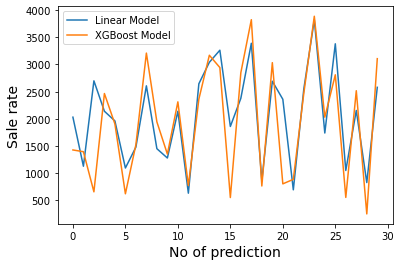

In [73]:
plt.plot(linear_test_pred[:30])
plt.plot(XGBoost_test_pred[:30])
plt.xlabel('No of prediction', fontsize=14)
plt.ylabel('Sale rate', fontsize=14)
plt.legend(['Linear Model', 'XGBoost Model'])

# Saving The Final Model

# Conclusion
### Analysis shows that,
1. Low fat rate product has most sale rate in all area.
2. The product whose visibility was less in front was most sold. People tend to find product for themselve. 
3. Snackfood is the demanding product and people less buy seafood on all store.
4. SuperMarket Type1 has most sale and they are small in size. People goes to buy these product on small SuperMarket.

### Model analysis
1. XGBoost model has higher accuracy then Linear model.

# Aim
1. My aim is to find why less sale on OUT010 and why highest sale on OUT017. 
2. If I were having large datasets then model could perform better. 
3. And these feature are less correlated to each other we need best features as well. 






###### I faced trouble to answer Hyperparameter tunning, If you are reading this, please Sir suggest me a channel or help me to understand this. 